In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import investpy
import datetime
import plotly.express as px
from plotly.subplots import make_subplots

# Enable matplot widgets
%matplotlib widget

In [2]:
# Load the dataset

#df = investpy.get_index_historical_data(index="S&P 500",
#                                        country="united states",
#                                        from_date="01/09/2006",
#                                        to_date="01/10/2011",
#                                        interval='Monthly',
#                                        order="asc"
#                                   )

df = investpy.get_index_historical_data(index="MSCI World",
                                        country="world",
                                        from_date="01/09/2006",
                                        to_date="01/10/2021",
                                        interval='Monthly',
                                        order="asc"
                                   )
#df = investpy.get_index_historical_data(index="IBEX 35",
#                                        country="spain",
#                                        from_date="01/09/2006",
#                                        to_date="01/09/2021",
#                                        interval='Monthly',
#                                        order="asc"
#                                   )

df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2006-09-01,1359.24,1377.77,1331.89,1373.37,0,USD
2006-10-01,1373.78,1432.29,1367.83,1422.93,0,USD
2006-11-01,1423.37,1457.80,1411.78,1455.17,0,USD
2006-12-01,1454.63,1490.24,1446.82,1483.58,0,USD
2007-01-01,1484.72,1508.43,1459.53,1500.23,0,USD


In [3]:
t = np.linspace(1,len(df.index),len(df.index))
index_rate = df['Open']/df['Open'][0] - 1

cantidad_aportaciones = 200
def corregir(x):
    if x > 0: return 0
    elif x >= - 0.05: return 150
    elif x >= - 0.1: return 180
    else: return 200

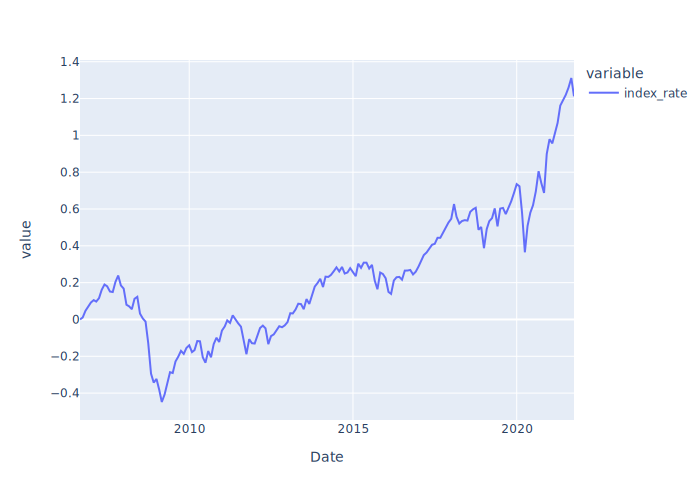

In [4]:
df_plot = pd.DataFrame(index=df.index)

df_plot['index_rate'] = index_rate

fig = px.line(df_plot)
fig.show('svg')

In [5]:
# Lump sum
lump_sum_inversion = np.ones((len(df.index),)) * len(df.index) * cantidad_aportaciones
rentabilidad_lump_sum = lump_sum_inversion * (1+index_rate)

In [6]:
# Aportaciones periódicas
aportaciones_periodicas_inversion = cantidad_aportaciones * t
participaciones_aportaciones_periodicas = cantidad_aportaciones / df['Open']
participaciones_aportaciones_periodicas_acum = participaciones_aportaciones_periodicas.cumsum()
rentabilidad_aportaciones_periodicas = participaciones_aportaciones_periodicas_acum * df['Open']

In [7]:
# Aportaciones periodicas con correcciones
correcciones = index_rate.apply(corregir)
cantidad_aportaciones_corregida = cantidad_aportaciones - correcciones.sum()/len(df.index)
correcciones_inversion = cantidad_aportaciones_corregida * t + correcciones.cumsum()
if correcciones_inversion.min()<0:
    raise RuntimeError(f"Hay aportaciones negativas. Valor mínimo: {correcciones_inversion.min()}")
participaciones_correccion = (cantidad_aportaciones_corregida + correcciones) / df['Open']
participaciones_correccion_acum = participaciones_correccion.cumsum()
rentabilidad_correccion = participaciones_correccion_acum * df['Open']

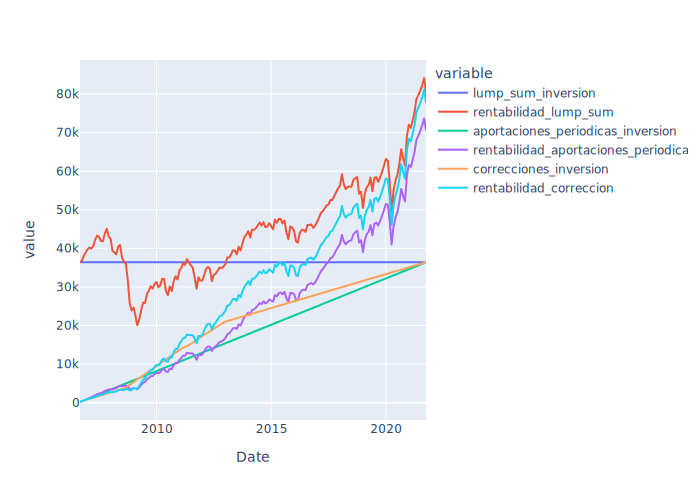

In [8]:
df_plot = pd.DataFrame(index=df.index)


df_plot['lump_sum_inversion'] = lump_sum_inversion
df_plot['rentabilidad_lump_sum'] = rentabilidad_lump_sum

df_plot['aportaciones_periodicas_inversion'] = aportaciones_periodicas_inversion
df_plot['rentabilidad_aportaciones_periodicas'] = rentabilidad_aportaciones_periodicas

df_plot['correcciones_inversion'] = correcciones_inversion
df_plot['rentabilidad_correccion'] = rentabilidad_correccion

fig = px.line(df_plot)
fig.show('svg')

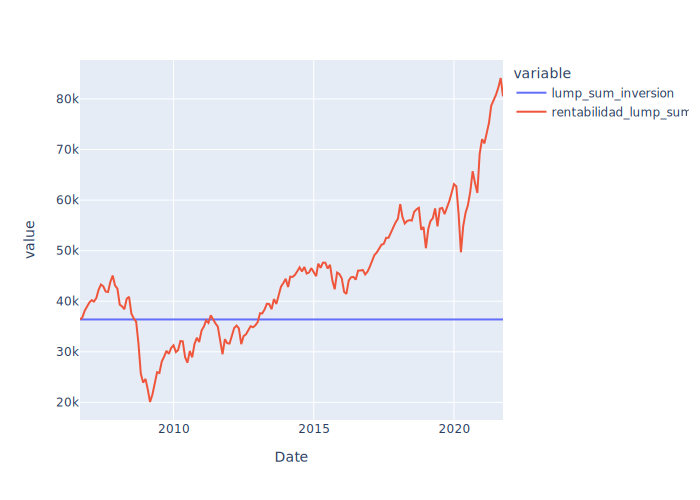

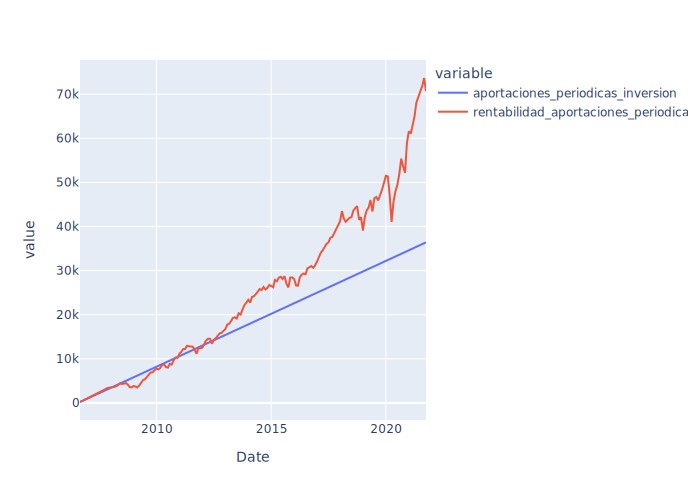

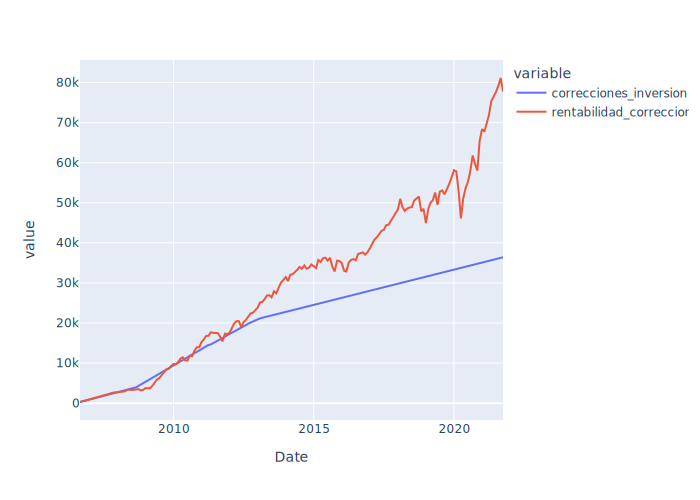

In [9]:
df_plot = pd.DataFrame(index=df.index)


df_plot['lump_sum_inversion'] = lump_sum_inversion
df_plot['rentabilidad_lump_sum'] = rentabilidad_lump_sum

fig = px.line(df_plot)
fig.show('svg')
df_plot = pd.DataFrame(index=df.index)

df_plot['aportaciones_periodicas_inversion'] = aportaciones_periodicas_inversion
df_plot['rentabilidad_aportaciones_periodicas'] = rentabilidad_aportaciones_periodicas

fig = px.line(df_plot)
fig.show('svg')
df_plot = pd.DataFrame(index=df.index)

df_plot['correcciones_inversion'] = correcciones_inversion
df_plot['rentabilidad_correccion'] = rentabilidad_correccion

fig = px.line(df_plot)
fig.show('svg')

In [10]:
# Resultados rentabilidad
anyos_inversion = len(df.index)/12
print(f"[*] Años de inversion: {anyos_inversion}")
print()
lumpsum_rentabilidad_final = rentabilidad_lump_sum[-1]/lump_sum_inversion[-1] -1
print("                                  LUMP SUM: {0}   \t - {1} anual".format(lumpsum_rentabilidad_final,lumpsum_rentabilidad_final/anyos_inversion))
aportaciones_periodicas_rentabilidad_final = rentabilidad_aportaciones_periodicas[-1]/aportaciones_periodicas_inversion[-1] -1
print("                   APORTACIONES PERIÓDICAS: {0}   \t - {1} anual".format(aportaciones_periodicas_rentabilidad_final,aportaciones_periodicas_rentabilidad_final/anyos_inversion))
correccion_rentabilidad_final = rentabilidad_correccion[-1]/correcciones_inversion[-1] -1
print("APORTACIONES PERIÓDICAS (CON CORRECCIONES): {0}   \t - {1} anual".format(correccion_rentabilidad_final,correccion_rentabilidad_final/anyos_inversion))

[*] Años de inversion: 15.166666666666666

                                  LUMP SUM: 1.2120817515670521   	 - 0.07991747812530015 anual
                   APORTACIONES PERIÓDICAS: 0.9425173822645516   	 - 0.062144003226234173 anual
APORTACIONES PERIÓDICAS (CON CORRECCIONES): 1.1368931609714896   	 - 0.07495998863548284 anual
